# SITS-BERT Complete Pipeline Exploration

## Initial Setup

In [1]:
# Reload modules automatically before executing code.
%load_ext autoreload
%autoreload 2

In [2]:
# Add SITS-BERT source code for import.
import sys

path = "/geosatlearn_app/ml_models/sits-bert"
if path not in sys.path:
    sys.path.append(path)
    print(f">>> Added {path} to sys.path")

>>> Added /geosatlearn_app/ml_models/sits-bert to sys.path


In [3]:
# Import modules.
import os

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

from sitsbert.dataset import FineTuneDataset, PreTrainDataset

## Data Structures

In [4]:
# Main parameters.
file_path = "/geosatlearn_app/ml_models/sits-bert/datafiles/california-labeled/Test.csv"
num_features = 10
seq_len = 64
bands_scale_factor = 1.0 / 10000.0
probability_for_masking = 0.15
positive_noise_amplitude = 0.5

### Fine Tunning Dataset

In [5]:
%%time

fine_tune_dataset_test = FineTuneDataset(
    file_path=file_path,
    num_features=num_features,
    seq_len=seq_len,
    bands_scale_factor=bands_scale_factor
)

CPU times: user 3.51 s, sys: 419 ms, total: 3.93 s
Wall time: 3.93 s


In [6]:
# Data set size.
print(f">>> Dataset length: {len(fine_tune_dataset_test)}")

>>> Dataset length: 318588


In [7]:
# Random selection.
intidx = np.random.randint(0, len(fine_tune_dataset_test))
print(f">>> Random index: {intidx}")

>>> Random index: 305711


In [8]:
# Dataset instance.
fine_tune_dataset_test[intidx].keys()

dict_keys(['bert_input', 'bert_mask', 'class_label', 'time'])

In [9]:
fine_tune_dataset_test[intidx]["bert_input"].shape

torch.Size([64, 10])

In [10]:
fine_tune_dataset_test[intidx]["bert_mask"]

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [11]:
fine_tune_dataset_test[intidx]["class_label"]

tensor([7])

In [12]:
fine_tune_dataset_test[intidx]["time"]

tensor([  2,  37,  42,  72,  77,  87,  97, 102, 107, 112, 122, 127, 132, 152,
        157, 172, 177, 182, 187, 192, 197, 202, 207, 212, 222, 227, 232, 237,
        242, 247, 252, 257, 262, 267, 272, 277, 282, 287, 297, 302, 307, 312,
        322, 327,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0])

### Plot Time Series

In [13]:
# Extract tensors.
mask = fine_tune_dataset_test[intidx]["bert_mask"].bool()
bands = fine_tune_dataset_test[intidx]["bert_input"][mask]
doys = fine_tune_dataset_test[intidx]["time"][mask]
label = fine_tune_dataset_test[intidx]["class_label"]

# Sentinel 2 bands names.
bands_names = [
    "B02", "B03", "B04", "B05", "B06", 
    "B07", "B08", "B8A", "B11", "B12"
]

# Save data in a pandas DataFrame.
df_bands = pd.DataFrame(
    data=bands.numpy(), 
    index=doys.numpy(), 
    columns=bands_names
)

# Show it.
df_bands

,B02,B03,B04,B05,B06,B07,B08,B8A,B11,B12
2,0.0482,0.0590,0.0836,0.1215,0.1582,0.1741,0.2020,0.2052,0.2085,0.1612
37,0.0418,0.0505,0.0692,0.0947,0.1206,0.1351,0.1544,0.1598,0.1845,0.1462
42,0.0435,0.0519,0.0678,0.0936,0.1178,0.1335,0.1516,0.1573,0.1843,0.1482
72,0.0645,0.0777,0.0971,0.1316,0.1815,0.2009,0.2202,0.2240,0.2282,0.1781
77,0.0575,0.0780,0.0903,0.1313,0.1987,0.2190,0.2338,0.2432,0.2275,0.1642
87,0.0455,0.0682,0.0602,0.1074,0.2226,0.2524,0.2614,0.2697,0.1930,0.1322
97,0.0396,0.0633,0.0526,0.0994,0.2431,0.2809,0.2818,0.2972,0.1942,0.1305
102,0.0558,0.0746,0.0711,0.1117,0.2580,0.3081,0.3128,0.3234,0.2062,0.1447
107,0.0368,0.0602,0.0492,0.0978,0.2619,0.3073,0.3112,0.3276,0.1837,0.1128
112,0.0450,0.0643,0.0544,0.0964,0.2663,0.3228,0.3298,0.3403,0.1884,0.1192


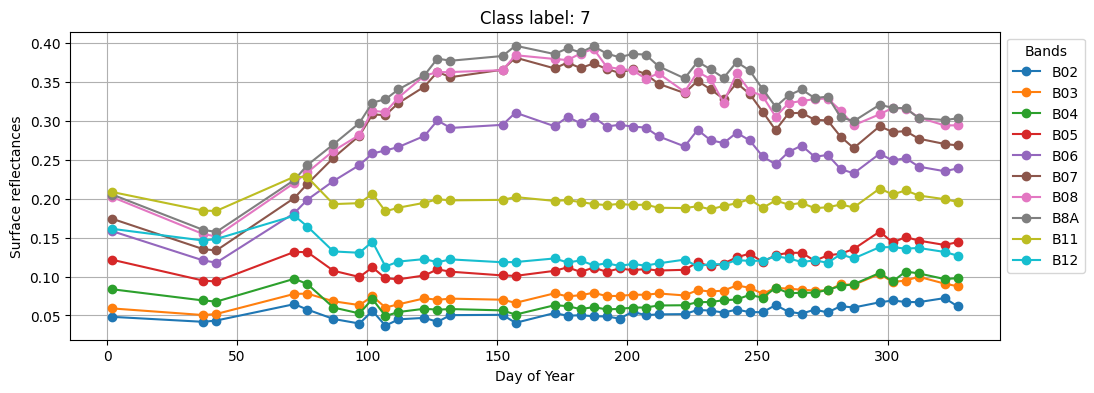

In [14]:
# Plot bands.
df_bands.plot(
    figsize=(12, 4), 
    title=f"Class label: {label.numpy()[0]}",
    xlabel="Day of Year",
    ylabel="Surface reflectances",
    grid=True,
    marker="o"
)

# Legend outside the plot.
plt.legend(
    loc="upper left", 
    bbox_to_anchor=(1, 1), 
    title="Bands",
    fontsize=10
);

## Pre Training Experiments

### Dataloader

In [15]:
# Main parameters.
file_path = "/geosatlearn_app/ml_models/sits-bert/datafiles/california-excluded-labels/Test.csv"
num_features = 10
seq_len = 64
bands_scale_factor = 1.0 / 10000.0
probability_for_masking = 0.15
positive_noise_amplitude = 0.5

In [16]:
# Prepare pre-training dataset.
pretrain_data_set = PreTrainDataset(
    file_path=file_path,
    num_features=num_features,
    seq_len=seq_len,
    bands_scale_factor=bands_scale_factor,
    probability_for_masking=probability_for_masking,
    positive_noise_amplitude=positive_noise_amplitude
)

>>> Loading data successful ...


### Visualize Instance

In [17]:
# Select a random sample from the pre-training dataset.
intidx = np.random.randint(0, len(pretrain_data_set))
data_instance = pretrain_data_set[intidx]

print(f">>> Random index: {intidx}")

>>> Random index: 117952


In [18]:
# Extract tensors.
bert_mask = data_instance["bert_mask"].bool()
bands = data_instance["bert_target"][bert_mask]
bands_perturbed = data_instance["bert_input"][bert_mask]
loss_mask = data_instance["loss_mask"][bert_mask]
doys = data_instance["time"][bert_mask]

# Print number of valid timesteps.
valid_timesteps = bert_mask.sum().item()
print(f">>> Number of valid timesteps: {valid_timesteps}")

# Verify if the timesteps are more than seq length.
if valid_timesteps > seq_len:
    print(f">>> Warning: Number of valid timesteps ({valid_timesteps}) is less than seq length ({seq_len})!")

>>> Number of valid timesteps: 44


In [19]:
# Save data in a pandas DataFrame.
df_bands = pd.DataFrame(
    data=bands.numpy(), 
    index=doys.numpy(), 
    columns=bands_names
)

# Save data in a pandas DataFrame.
df_bands_perturbed = pd.DataFrame(
    data=bands_perturbed.numpy(), 
    index=doys.numpy(), 
    columns=bands_names
)

# Create columns for locations of perturbed pixels.
df_bands["perturbed"] = loss_mask.numpy()
df_bands_perturbed["perturbed"] = loss_mask.numpy()

# Count number of perturbed pixels.
num_perturbed = np.sum(loss_mask.numpy())

# Show it.
df_bands_perturbed

,B02,B03,B04,B05,B06,B07,B08,B8A,B11,B12,perturbed
2,0.035700,0.049700,0.048100,0.083400,0.131600,0.134900,0.147200,0.158900,0.263000,0.195800,0
37,0.034400,0.063300,0.038500,0.107700,0.239800,0.265500,0.275200,0.281200,0.232800,0.131300,0
42,0.038000,0.064900,0.040000,0.110700,0.246600,0.270900,0.296800,0.288900,0.232000,0.135100,0
72,0.039300,0.065000,0.045500,0.114600,0.251300,0.275500,0.301000,0.305300,0.207500,0.120100,0
77,0.039700,0.066600,0.050500,0.122100,0.254200,0.282500,0.284400,0.307100,0.209600,0.110900,0
87,0.035600,0.061100,0.046900,0.108900,0.232500,0.269200,0.269200,0.289200,0.184300,0.103500,0
97,0.038900,0.065000,0.067800,0.126300,0.218900,0.255800,0.249200,0.285200,0.232600,0.133700,0
102,0.063900,0.087400,0.103800,0.162200,0.231800,0.261800,0.292800,0.303100,0.269300,0.169900,0
107,0.070000,0.105400,0.140600,0.197200,0.243200,0.273600,0.304400,0.322200,0.304400,0.188500,0
112,0.089300,0.119800,0.180800,0.216400,0.243800,0.274100,0.318600,0.321300,0.341200,0.219700,0


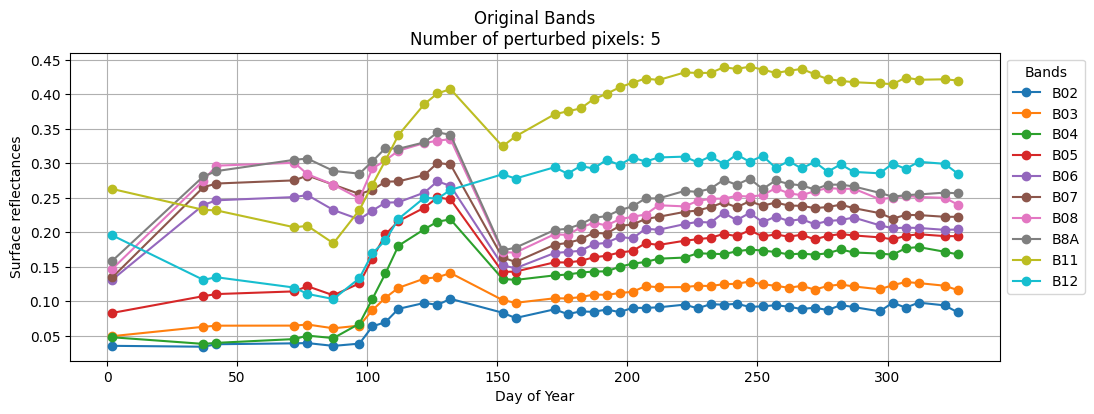

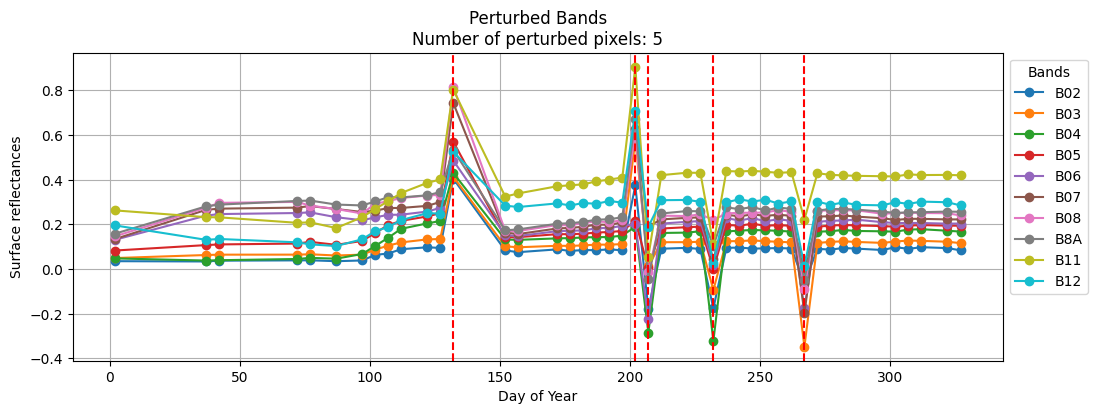

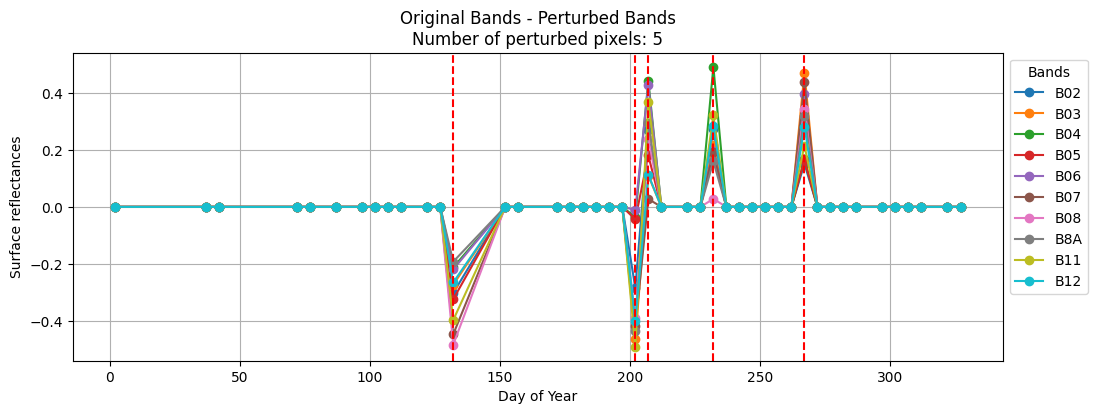

In [20]:
# Plot original time series
ax1 = df_bands.drop(labels=["perturbed"], axis=1).plot(
    figsize=(12, 4), 
    title=f"Original Bands\nNumber of perturbed pixels: {num_perturbed}",
    xlabel="Day of Year",
    ylabel="Surface reflectances",
    grid=True,
    marker="o",
)

# Plot perturbed time series.
ax2 = df_bands_perturbed.drop(labels=["perturbed"], axis=1).plot(
    figsize=(12, 4), 
    title=f"Perturbed Bands\nNumber of perturbed pixels: {num_perturbed}",
    xlabel="Day of Year",
    ylabel="Surface reflectances",
    grid=True,
    marker="o",
)

# Plot different y-axis for perturbed time series.
ax3 = (df_bands.drop(labels=["perturbed"], axis=1) - df_bands_perturbed.drop(labels=["perturbed"], axis=1)).plot(
    figsize=(12, 4), 
    title=f"Original Bands - Perturbed Bands\nNumber of perturbed pixels: {num_perturbed}",
    xlabel="Day of Year",
    ylabel="Surface reflectances",
    grid=True,
    marker="o",
)

# Plot perturbed locations as vertical red lines.
for idx in df_bands_perturbed.index:
    if df_bands_perturbed.loc[idx, "perturbed"]:
        doy = df_bands_perturbed.loc[idx].name
        ax2.axvline(x=doy, color="red", linestyle="--", linewidth=1.5)
        ax3.axvline(x=doy, color="red", linestyle="--", linewidth=1.5)

# Legend outside the plot.
ax1.legend(
    loc="upper left", 
    bbox_to_anchor=(1, 1), 
    title="Bands",
    fontsize=10,
   
)

# Legend outside the plot.
ax2.legend(
    loc="upper left", 
    bbox_to_anchor=(1, 1), 
    title="Bands",
    fontsize=10,  
)

# Legend outside the plot.
ax3.legend(
    loc="upper left", 
    bbox_to_anchor=(1, 1), 
    title="Bands",
    fontsize=10,  
);